## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    if flatten:
        x = x.reshape((len(x), -1))
        min_max_scaler = preprocessing.MinMaxScaler()
        x = min_max_scaler.fit_transform(x)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [7]:
!pip install sklearn

In [8]:
from sklearn import preprocessing
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


model = build_mlp(input_shape=x_train.shape[1:])
model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 64)                8256      
_______

In [12]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [14]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 214us/step - loss: 1.9374 - acc: 0.2912 - val_loss: 1.7565 - val_acc: 0.3635
Epoch 2/100
50000/50000 [==============================] - 9s 175us/step - loss: 1.7363 - acc: 0.3735 - val_loss: 1.6561 - val_acc: 0.4054
Epoch 3/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.6540 - acc: 0.4033 - val_loss: 1.6976 - val_acc: 0.3939
Epoch 4/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.5897 - acc: 0.4309 - val_loss: 1.5610 - val_acc: 0.4395
Epoch 5/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.5385 - acc: 0.4486 - val_loss: 1.5275 - val_acc: 0.4503
Epoch 6/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.4992 - acc: 0.4608 - val_loss: 1.4991 - val_acc: 0.4627
Epoch 7/100
50000/50

50000/50000 [==============================] - 8s 154us/step - loss: 0.5791 - acc: 0.7889 - val_loss: 2.0331 - val_acc: 0.4970
Epoch 56/100
50000/50000 [==============================] - 8s 158us/step - loss: 0.5441 - acc: 0.8039 - val_loss: 2.0869 - val_acc: 0.4989
Epoch 57/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.5654 - acc: 0.7942 - val_loss: 2.1047 - val_acc: 0.4944
Epoch 58/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.5372 - acc: 0.8057 - val_loss: 2.1303 - val_acc: 0.4944
Epoch 59/100
50000/50000 [==============================] - 9s 170us/step - loss: 0.5581 - acc: 0.7985 - val_loss: 2.1218 - val_acc: 0.4984
Epoch 60/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.5101 - acc: 0.8126 - val_loss: 2.2334 - val_acc: 0.5062
Epoch 61/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.5084 - acc: 0.8148 - val_loss: 2.1971 - val_acc: 0.5012
Epoch 62/100
50000/50000 [=======

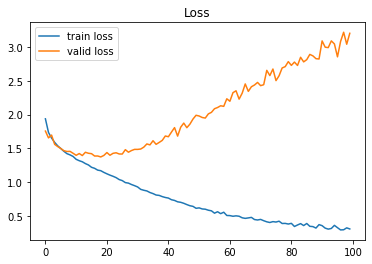

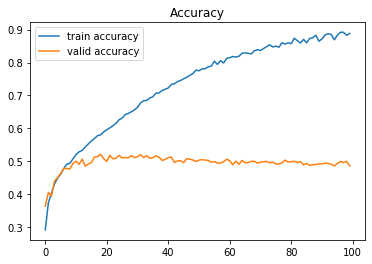

In [20]:
%matplotlib inline 
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()